In [269]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score

In [270]:
df= pd.read_csv("titanic-passengers.csv",sep=';')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [271]:
df['Age'].fillna(df['Age'].mean(),inplace= True)

In [272]:
d={'Survived':{'No':0,'Yes':1}}
df.replace(d,inplace=True)

In [273]:
x = df[['Age','Parch','Pclass']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test) 
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.69


In [274]:
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
roc_auc_score(y, clf.predict_proba(X)[:, 1])
roc_auc_score(y, clf.decision_function(X))

0.9945959515881825

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

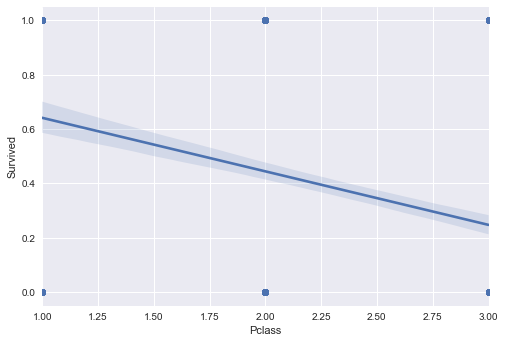

In [275]:
import seaborn as sns
sns.regplot(x='Pclass',y='Survived',data=df)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

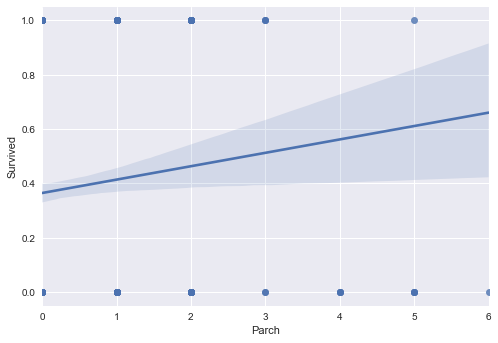

In [276]:
import seaborn as sns
sns.regplot(x='Parch',y='Survived',data=df)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

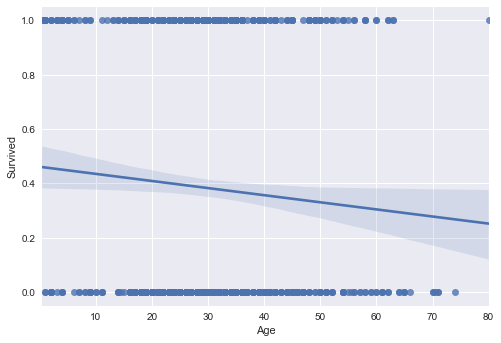

In [277]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='Actual'>

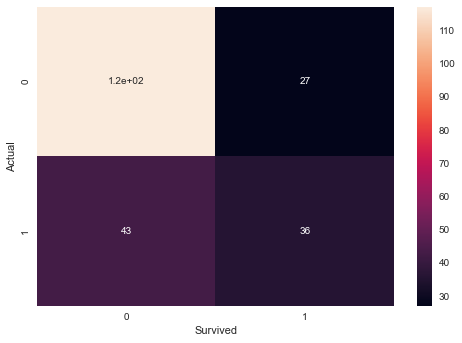

In [278]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Survived'])
sns.heatmap(confusion_matrix, annot=True)

ROC / AUC :

The Receiver Operator Characteristic (ROC) curve is an evaluation metric 
for binary classification problems. It is a probability curve that plots 
the TPR against FPR at various threshold values and essentially separates 
the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure
of the ability of a classifier to distinguish between classes and is used
as a summary of the ROC curve.

In [314]:
x = df[['Pclass','Age','Fare']]
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.70


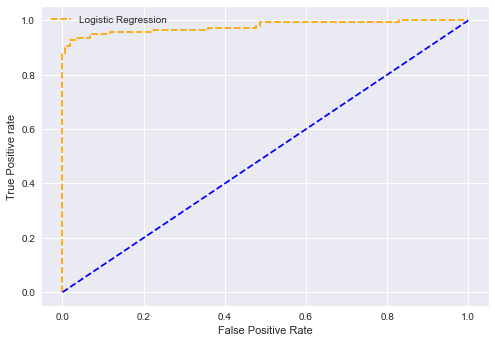

In [315]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();